## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [52]:
# your code here
#model1 = nn.Sequential(OrderedDict([
#    ('hidden', nn.
#]))
model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('output', nn.Linear(4, 1)),
    ('sigmoid', nn.Sigmoid())
]))

In [53]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [54]:
model2 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 4)),
    ('hidden2', nn.Linear(4, 4)),
    ('output', nn.Linear(4, 1)),
    ('sigmoid', nn.Sigmoid())
]))

In [55]:
print(model2)

Sequential(
  (hidden1): Linear(in_features=2, out_features=4, bias=True)
  (hidden2): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [56]:
model3 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 8)),
    ('relu', nn.ReLU()),
    ('hidden2', nn.Linear(8, 8)),
    ('output', nn.Linear(8, 1)),
    ('sigmoid', nn.Sigmoid())
]))

In [57]:
print(model3)

Sequential(
  (hidden1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (hidden2): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [58]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [59]:
# your code here
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


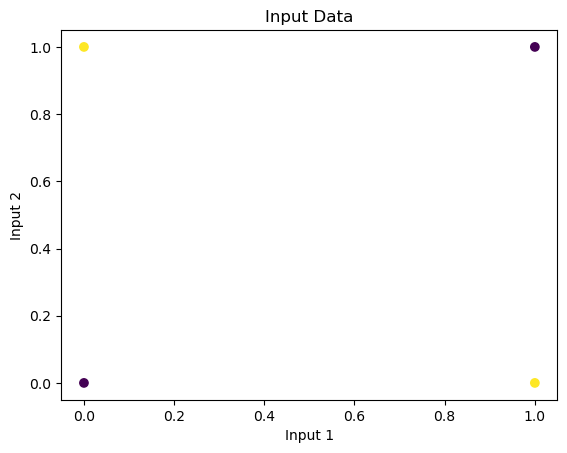

In [60]:
# visualize the results
import matplotlib.pyplot as plt

# plot the input data
plt.scatter(data_in[:,0], data_in[:,1], c=data_target.squeeze())
plt.title('Input Data')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

In [61]:
# your code here
criterion = nn.BCELoss()

In [62]:
# your code here
# Train the models
num_epochs = 1000

# train model1
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)
print("Model 1")
for epoch in range(num_epochs):
    # forward pass
    outputs1 = model1(data_in)
    loss = criterion(outputs1, data_target)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print model1 weights
print('Weights for Model 1:')
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model 1
Epoch [100/1000], Loss: 0.6933
Epoch [200/1000], Loss: 0.6932
Epoch [300/1000], Loss: 0.6932
Epoch [400/1000], Loss: 0.6932
Epoch [500/1000], Loss: 0.6932
Epoch [600/1000], Loss: 0.6932
Epoch [700/1000], Loss: 0.6932
Epoch [800/1000], Loss: 0.6932
Epoch [900/1000], Loss: 0.6931
Epoch [1000/1000], Loss: 0.6931
Weights for Model 1:
hidden.weight tensor([[-0.4031, -0.0521],
        [-0.0892,  0.4430],
        [-0.1118,  0.6030],
        [ 0.1278,  0.6767]])
hidden.bias tensor([-0.1945, -0.2166, -0.1531, -0.0081])
output.weight tensor([[ 0.1384, -0.4541,  0.0755,  0.2421]])
output.bias tensor([-0.0625])


In [63]:
# train model2
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)
print("Model 2")
for epoch in range(num_epochs):
    # forward pass
    outputs2 = model2(data_in)
    loss = criterion(outputs2, data_target)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print model2 weights
print('Weights for Model 2:')
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model 2
Epoch [100/1000], Loss: 0.6932
Epoch [200/1000], Loss: 0.6932
Epoch [300/1000], Loss: 0.6932
Epoch [400/1000], Loss: 0.6932
Epoch [500/1000], Loss: 0.6932
Epoch [600/1000], Loss: 0.6932
Epoch [700/1000], Loss: 0.6932
Epoch [800/1000], Loss: 0.6932
Epoch [900/1000], Loss: 0.6932
Epoch [1000/1000], Loss: 0.6932
Weights for Model 2:
hidden1.weight tensor([[ 0.0805, -0.0942],
        [-0.7229,  0.2155],
        [ 0.3533,  0.4768],
        [ 0.6080, -0.5744]])
hidden1.bias tensor([ 0.0270, -0.4517,  0.3175, -0.5335])
hidden2.weight tensor([[ 0.0575,  0.2577,  0.0371,  0.1643],
        [-0.1546, -0.3894, -0.4022,  0.0430],
        [-0.4345, -0.2695,  0.2705, -0.1590],
        [-0.1105, -0.0591, -0.0161,  0.4392]])
hidden2.bias tensor([-0.0248, -0.3344, -0.0117, -0.4204])
output.weight tensor([[-0.3054,  0.1482, -0.0829, -0.1479]])
output.bias tensor([-0.0779])


In [64]:
# train model3
optimizer = torch.optim.SGD(model3.parameters(), lr=0.1)
print("Model 3")
for epoch in range(num_epochs):
    # forward pass
    outputs3 = model3(data_in)
    loss = criterion(outputs3, data_target)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print model3 weights
print('Weights for Model 3:')
for name, param in model3.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Model 3
Epoch [100/1000], Loss: 0.5919
Epoch [200/1000], Loss: 0.1660
Epoch [300/1000], Loss: 0.0316
Epoch [400/1000], Loss: 0.0129
Epoch [500/1000], Loss: 0.0074
Epoch [600/1000], Loss: 0.0050
Epoch [700/1000], Loss: 0.0037
Epoch [800/1000], Loss: 0.0028
Epoch [900/1000], Loss: 0.0023
Epoch [1000/1000], Loss: 0.0019
Weights for Model 3:
hidden1.weight tensor([[ 0.8019,  0.5439],
        [-1.0740, -1.0739],
        [ 1.1052,  1.6634],
        [-0.9666, -0.9664],
        [ 0.2930, -0.3866],
        [ 0.3068,  0.0457],
        [ 0.2720,  0.6609],
        [-1.1884,  1.1883]])
hidden1.bias tensor([ 4.6174e-01,  1.0741e+00, -1.1054e+00,  9.6626e-01, -5.2571e-01,
         4.8316e-01, -1.6464e-02,  1.0237e-04])
hidden2.weight tensor([[ 8.4192e-02,  9.8400e-02, -2.6137e-01, -9.2657e-02,  6.3076e-02,
          2.7515e-01,  3.3573e-01, -2.5194e-01],
        [-3.9872e-01,  1.0924e+00,  1.4375e+00,  9.7945e-01,  1.7757e-01,
         -4.0802e-01,  1.2819e-01, -1.1124e+00],
        [ 2.2850e-01, -8.

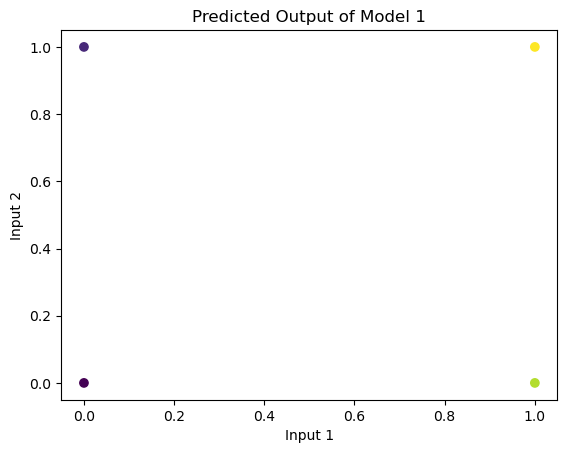

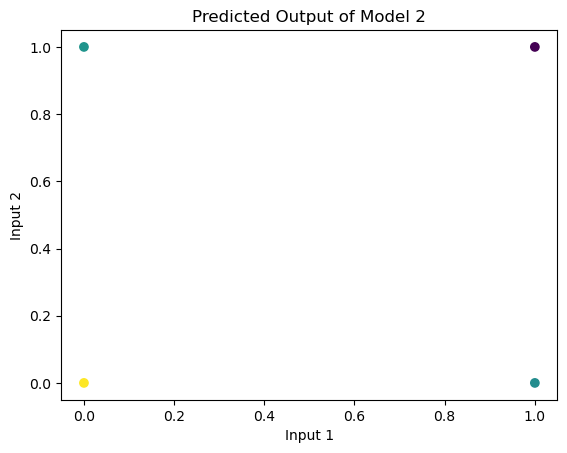

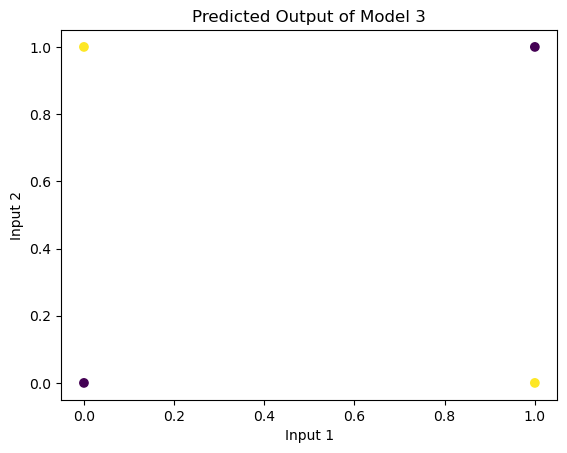

In [65]:
# plot the predicted output of each model
for i, model in enumerate([model1, model2, model3], start=1):
    predicted = model(data_in)
    predicted = predicted.squeeze().detach().numpy()
    plt.scatter(data_in[:,0], data_in[:,1], c=predicted)
    plt.title(f'Predicted Output of Model {i}')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()